<a href="https://colab.research.google.com/github/jw9603/AIM5021_41-/blob/main/12week(2%2C3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2. 한국어 Word2Vec 만들기

In [ ]:
!pip3 install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 36.5 MB/s 
     |████████████████████████████████| 465 kB 52.4 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fca0403ef10>)

In [ ]:
train_data = pd.read_table('ratings.txt')

train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
# 총 리뷰 개수 출력
print(len(train_data))

200000


In [ ]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [ ]:
# 결측값이 존재하므로 결측값이 존재하는 행을 제거
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [ ]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [07:40<00:00, 434.22it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


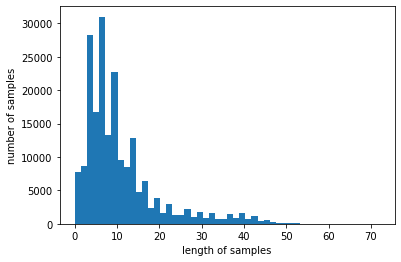

In [ ]:
# 토큰화가 된 상태에서는 각 리뷰의 길이 분포 또한 확인이 가능합니다.

# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

[('안성기', 0.887732982635498), ('최민수', 0.883116602897644), ('한석규', 0.8811107873916626), ('설경구', 0.8774091005325317), ('이민호', 0.8721607327461243), ('김명민', 0.8634982705116272), ('채민서', 0.860049307346344), ('주진모', 0.8565249443054199), ('송강호', 0.8564515113830566), ('엄정화', 0.8553417325019836)]


In [ ]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8934286832809448), ('호러', 0.861284613609314), ('무비', 0.8476128578186035), ('느와르', 0.8416826128959656), ('정통', 0.835381031036377), ('블록버스터', 0.8346384763717651), ('무협', 0.8327451944351196), ('물의', 0.818745493888855), ('고어', 0.7964931130409241), ('패러디', 0.7926885485649109)]


### 3. 사전 훈련된 Word2vec 임베딩

In [ ]:
import gensim.downloader

print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
glove_vectors = gensim.downloader.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
glove_vectors.most_similar('user')

[('tumblr', 0.8275099396705627),
 ('icon', 0.8236418962478638),
 ('link', 0.783708930015564),
 ('e-mail', 0.776808500289917),
 ('email', 0.7740230560302734),
 ('facebook', 0.7734258770942688),
 ('bio', 0.7573501467704773),
 ('account', 0.7568464279174805),
 ('banner', 0.7565149068832397),
 ('app', 0.7561104893684387)]

In [ ]:
glove_vectors.most_similar(positive=['twitter','sns'],negative=['facebook'],topn=5)

[('bot', 0.5940154194831848),
 ('kakao', 0.5650826692581177),
 ('olleh', 0.5596516132354736),
 ('퀴즈', 0.559276819229126),
 ('劣化', 0.5556857585906982)]